In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split


In [2]:
df = pd.read_csv("credit_risk_dataset.csv")
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [3]:
df.tail()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26
32580,66,42000,RENT,2.0,MEDICAL,B,6475,9.99,0,0.15,N,30


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [5]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [6]:
df.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

In [7]:
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [15]:
cols_to_encode = [
	'cb_person_cred_hist_length', 'cb_person_default_on_file', 'cb_person_employed',
	'cb_person_home_ownership', 'cb_person_income_type', 'cb_person_marital_status',
	'cb_person_purpose', 'cb_person_region', 'cb_person_state'
]
existing_cols = [c for c in cols_to_encode if c in df.columns]
if existing_cols:
	df = pd.get_dummies(df, columns=existing_cols, drop_first=True)
else:
	print("No specified categorical columns found in df; nothing to encode.")


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 39 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   person_age                     32581 non-null  int64  
 1   person_income                  32581 non-null  int64  
 2   person_home_ownership          32581 non-null  object 
 3   person_emp_length              31686 non-null  float64
 4   loan_intent                    32581 non-null  object 
 5   loan_grade                     32581 non-null  object 
 6   loan_amnt                      32581 non-null  int64  
 7   loan_int_rate                  29465 non-null  float64
 8   loan_status                    32581 non-null  int64  
 9   loan_percent_income            32581 non-null  float64
 10  cb_person_cred_hist_length_3   32581 non-null  bool   
 11  cb_person_cred_hist_length_4   32581 non-null  bool   
 12  cb_person_cred_hist_length_5   32581 non-null 

In [17]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,...,cb_person_cred_hist_length_22,cb_person_cred_hist_length_23,cb_person_cred_hist_length_24,cb_person_cred_hist_length_25,cb_person_cred_hist_length_26,cb_person_cred_hist_length_27,cb_person_cred_hist_length_28,cb_person_cred_hist_length_29,cb_person_cred_hist_length_30,cb_person_default_on_file_Y
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,...,False,False,False,False,False,False,False,False,False,True
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,...,False,False,False,False,False,False,False,False,False,False
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,...,False,False,False,False,False,False,False,False,False,False
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,...,False,False,False,False,False,False,False,False,False,False
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,...,False,False,False,False,False,False,False,False,False,True


In [18]:
x = df.drop('loan_status', axis=1)
y = df['loan_status']

In [19]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [20]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((26064, 38), (6517, 38), (26064,), (6517,))

In [23]:
# xg boost model
import xgboost as xgb

# Identify object columns in X_train
cat_cols = X_train.select_dtypes(include=['object']).columns.tolist()

# One-hot encode categorical columns
X_train_enc = pd.get_dummies(X_train, columns=cat_cols, drop_first=True)
X_test_enc = pd.get_dummies(X_test, columns=cat_cols, drop_first=True)

# Align columns of train and test set
X_train_enc, X_test_enc = X_train_enc.align(X_test_enc, join='left', axis=1, fill_value=0)

model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train_enc, y_train)


c:\Users\Gokulnath.V\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [21:29:10] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


In [24]:
# evaluate the model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
y_pred = model.predict(X_test_enc)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))  

Accuracy: 0.9324842719042504
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.99      0.96      5072
           1       0.94      0.74      0.83      1445

    accuracy                           0.93      6517
   macro avg       0.94      0.86      0.89      6517
weighted avg       0.93      0.93      0.93      6517

Confusion Matrix:
 [[5008   64]
 [ 376 1069]]


In [25]:
# auc roc curve
from sklearn.metrics import roc_auc_score, roc_curve
y_prob = model.predict_proba(X_test_enc)[:, 1]
auc = roc_auc_score(y_test, y_prob)
print("AUC-ROC:", auc)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)


AUC-ROC: 0.950332785740015


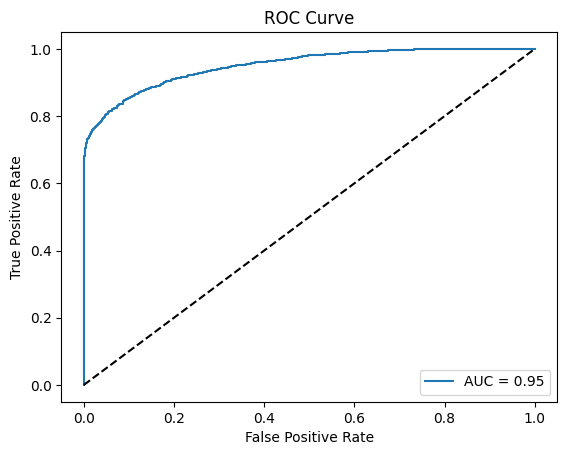

In [26]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr, tpr, label='AUC = %.2f' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

c:\Users\Gokulnath.V\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


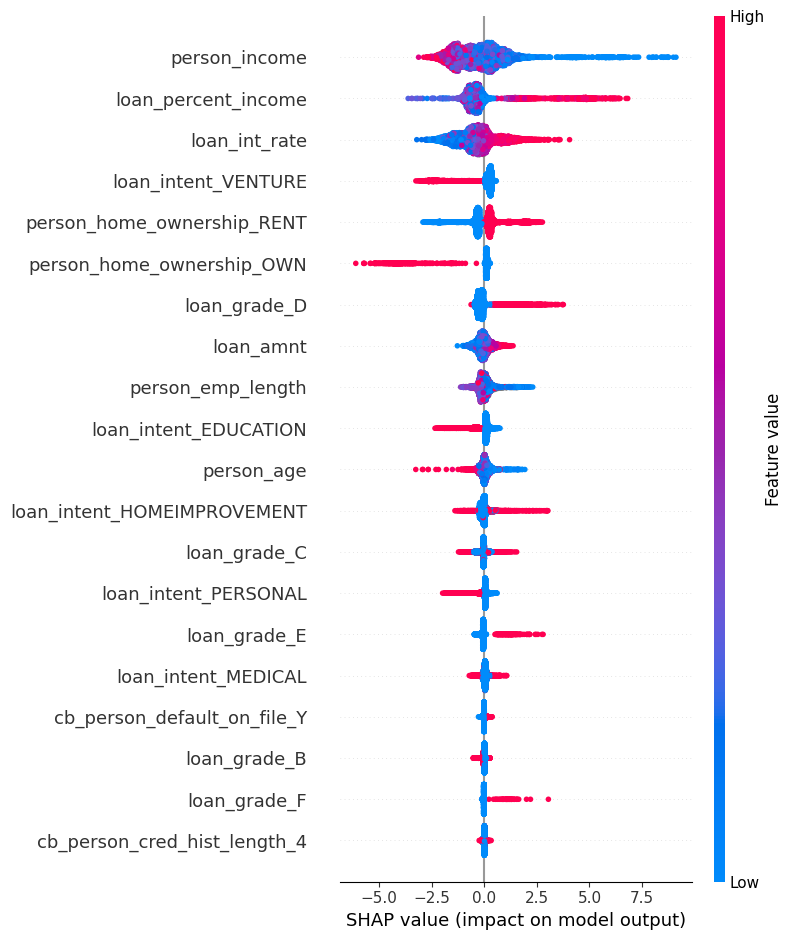

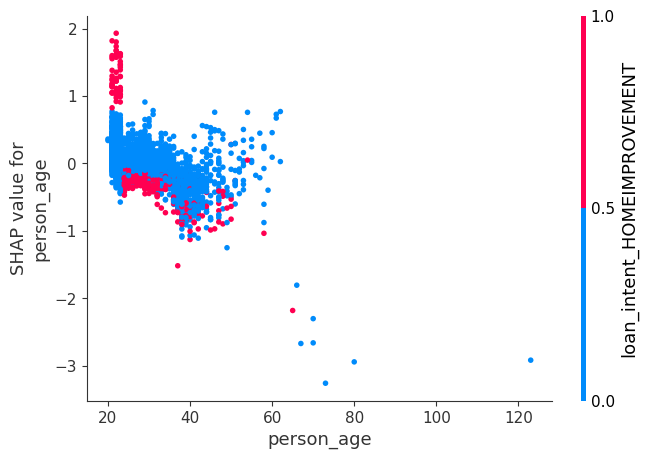

In [27]:
# SHAP Analysis
import shap
explainer = shap.Explainer(model)
shap_values = explainer(X_test_enc)
shap.summary_plot(shap_values, X_test_enc)
shap.dependence_plot(0, shap_values.values, X_test_enc)  # Replace 0 with the index of the feature you want to plot
import matplotlib.pyplot as plt
plt.show()

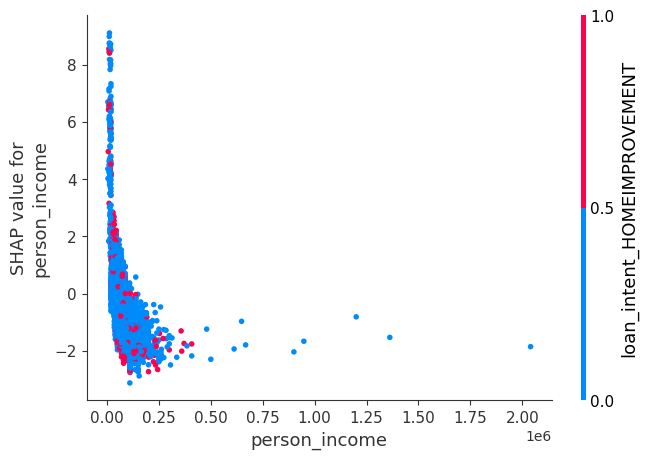

In [28]:
# shap dependence plot
shap.dependence_plot(1, shap_values.values, X_test_enc)  # Replace 1 with the index of another feature you want to plot
import matplotlib.pyplot as plt
plt.show()

In [29]:
# Local Interpretation (Individual Explanations)
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values.values[0,:], X_test_enc.iloc[0,:])
import matplotlib.pyplot as plt
plt.show()

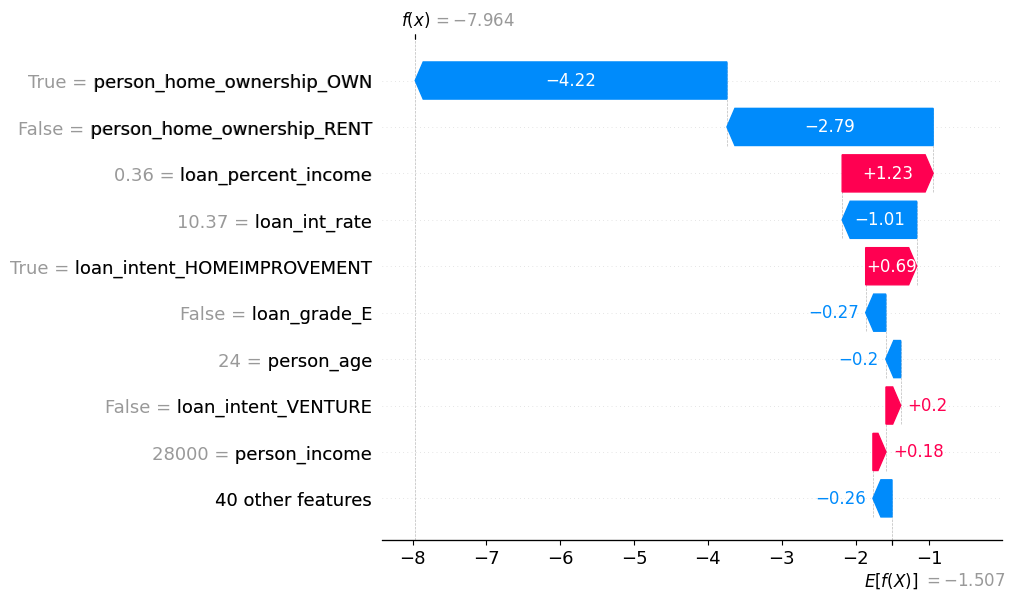

In [31]:
# SHAP force / waterfall plot
shap.plots.waterfall(shap_values[0])
plt.show()